In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import yfinance as yf

In [2]:
# Read & Import Data
Stocks = yf.download('BUG CALF DSTL ESGU EWU FDN IXN QQQ QUAL VGT VOO XLK', start='2020-03-01', end='2022-03-01') 
Stocks.tail()
# Why this timeline

[*********************100%***********************]  12 of 12 completed


Adj Close                                                          \
                  BUG       CALF       DSTL       ESGU        EWU         FDN   
Date                                                                            
2022-02-22  27.879999  40.090000  43.419998  96.379997  34.090000  180.539993   
2022-02-23  27.309999  39.540001  42.770000  94.610001  34.099998  175.179993   
2022-02-24  29.420000  40.060001  42.950001  96.279999  32.939999  183.820007   
2022-02-25  29.730000  41.049999  44.029999  98.339996  34.220001  186.330002   
2022-02-28  30.860001  41.310001  43.869999  98.160004  33.490002  187.729996   

                                                           ...  Volume  \
                  IXN         QQQ        QUAL         VGT  ...    DSTL   
Date                                                       ...           
2022-02-22  55.599998  338.079987  126.699997  394.179993  ...   83700   
2022-02-23  54.270000  329.420013  124.639999  384.209991  ...  133100   
2022-02-24  55.830002  340.489990  127.000000  398.089996  ...  307100   
2022-02-25  56.650002  345.769989  130.130005  403.820007  ...  219900   
2022-02-28  56.500000  346.799988  129.880005  403.910004  ...  110000   

                                                                             \
               ESGU       EWU      FDN     IXN        QQQ     QUAL      VGT   
Date                                                                          
2022-02-22  1512900   5654400   469500  327300   85967100  1645700  2183500   
2022-02-23  1851800   5626300   404000  328200   86215400  1505300   718400   
2022-02-24  1825600  11730800  1063400  435300  130614100  2931400  2310000   
2022-02-25  1119800   7636400   415000  504900   78842100  1626200   670600   
2022-02-28  1632800   6595400   500600  470800   77226200  1608300   592500   

                                
                 VOO       XLK  
Date                            
2022-02-22  10414700  13446800  
2022-02-23  12154900  18939700  
2022-02-24  21277200  25483900  
2022-02-25  11665200  14150800  
2022-02-28  11855900  17408600  

[5 rows x 72 columns]

In [3]:
Stocks = Stocks['Adj Close']
print (Stocks)

                  BUG       CALF       DSTL       ESGU        EWU         FDN  \
Date                                                                            
2020-03-02  16.127823  22.777254  28.531370  67.079506  27.528002  140.949997   
2020-03-03  15.668724  22.353464  27.747002  65.318344  27.183084  137.009995   
2020-03-04  16.068586  22.924103  28.943163  68.052521  28.273764  141.720001   
2020-03-05  15.752645  22.011475  27.992117  65.902161  27.453426  137.740005   
2020-03-06  15.248127  21.754240  27.697979  64.598320  26.978001  135.259995   
...               ...        ...        ...        ...        ...         ...   
2022-02-22  27.879999  40.090000  43.419998  96.379997  34.090000  180.539993   
2022-02-23  27.309999  39.540001  42.770000  94.610001  34.099998  175.179993   
2022-02-24  29.420000  40.060001  42.950001  96.279999  32.939999  183.820007   
2022-02-25  29.730000  41.049999  44.029999  98.339996  34.220001  186.330002   
2022-02-28  30.860001  41.31

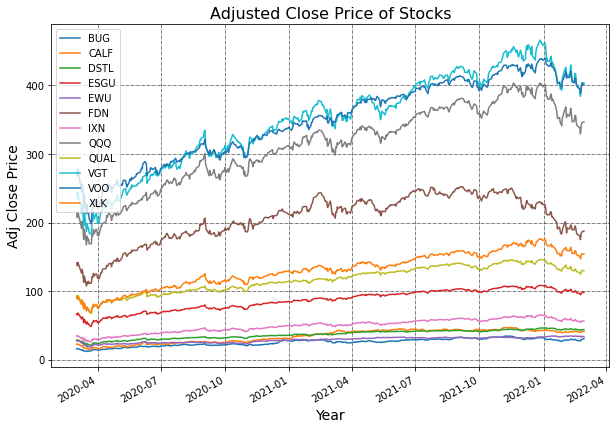

In [4]:
# Plot the adjusted close price
Stocks.plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of Stocks" % Stocks, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [5]:
# Log of percentage change of all stocks in the list
Ret= Stocks.pct_change().apply(lambda x: np.log(1+x)) 
# CONVERT TO RETURN 
Ret.head()

,BUG,CALF,DSTL,ESGU,EWU,FDN,IXN,QQQ,QUAL,VGT,VOO,XLK
Date,,,,,,,,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,-0.028879,-0.018781,-0.027876,-0.026606,-0.012609,-0.028351,-0.034869,-0.032593,-0.030453,-0.037171,-0.027970,-0.038716
2020-03-04,0.025200,0.025208,0.042206,0.041007,0.039339,0.033799,0.042168,0.040876,0.038233,0.039990,0.040607,0.042027
2020-03-05,-0.019858,-0.040625,-0.033411,-0.032109,-0.029443,-0.028485,-0.032766,-0.030853,-0.032025,-0.031780,-0.034072,-0.032069
2020-03-06,-0.032552,-0.011755,-0.010563,-0.019983,-0.017469,-0.018169,-0.019832,-0.017016,-0.014726,-0.021437,-0.016914,-0.021365


<AxesSubplot:title={'center':'Stocks daily returns'}, xlabel='Date'>

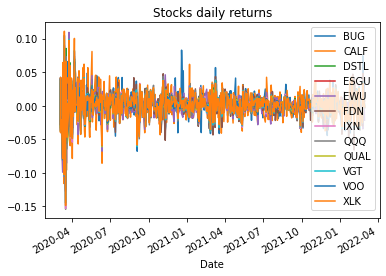

In [6]:
Ret.plot(title='Stocks daily returns')

In [7]:
Ann_Ret = Ret.mean()*252 
print (Ann_Ret)

BUG     0.325103
CALF    0.298263
DSTL    0.215541
ESGU    0.190739
EWU     0.098216
FDN     0.143585
IXN     0.243157
QQQ     0.241484
QUAL    0.166538
VGT     0.253325
VOO     0.189568
XLK     0.260390
dtype: float64


In [8]:
Ann_Risk = Ret.std()*(252)**(0.5) 
print(Ann_Risk)

BUG     0.316734
CALF    0.374915
DSTL    0.264979
ESGU    0.262425
EWU     0.280246
FDN     0.313854
IXN     0.312473
QQQ     0.288517
QUAL    0.257660
VGT     0.315744
VOO     0.260570
XLK     0.316744
dtype: float64


In [9]:
Ret_Corr = Ret.corr() 
print(Ret_Corr)

           BUG      CALF      DSTL      ESGU       EWU       FDN       IXN  \
BUG   1.000000  0.420983  0.554115  0.651048  0.444256  0.834327  0.713622   
CALF  0.420983  1.000000  0.802964  0.769285  0.787927  0.535068  0.643437   
DSTL  0.554115  0.802964  1.000000  0.963274  0.855595  0.743813  0.887680   
ESGU  0.651048  0.769285  0.963274  1.000000  0.838896  0.842095  0.948629   
EWU   0.444256  0.787927  0.855595  0.838896  1.000000  0.583728  0.735596   
FDN   0.834327  0.535068  0.743813  0.842095  0.583728  1.000000  0.894133   
IXN   0.713622  0.643437  0.887680  0.948629  0.735596  0.894133  1.000000   
QQQ   0.743118  0.590049  0.845533  0.924829  0.672468  0.932298  0.976277   
QUAL  0.619590  0.770459  0.951756  0.985283  0.831235  0.803268  0.925711   
VGT   0.748263  0.628877  0.867131  0.941416  0.700347  0.918057  0.991905   
VOO   0.628700  0.776839  0.966881  0.997880  0.847584  0.823046  0.941880   
XLK   0.711571  0.623597  0.877352  0.944990  0.706398  0.895775

In [10]:
Ret_Covar = Ret.cov() 
print(Ret_Covar)

           BUG      CALF      DSTL      ESGU       EWU       FDN       IXN  \
BUG   0.000398  0.000198  0.000185  0.000215  0.000156  0.000329  0.000280   
CALF  0.000198  0.000558  0.000317  0.000300  0.000329  0.000250  0.000299   
DSTL  0.000185  0.000317  0.000279  0.000266  0.000252  0.000245  0.000292   
ESGU  0.000215  0.000300  0.000266  0.000273  0.000245  0.000275  0.000309   
EWU   0.000156  0.000329  0.000252  0.000245  0.000312  0.000204  0.000256   
FDN   0.000329  0.000250  0.000245  0.000275  0.000204  0.000391  0.000348   
IXN   0.000280  0.000299  0.000292  0.000309  0.000256  0.000348  0.000387   
QQQ   0.000269  0.000253  0.000257  0.000278  0.000216  0.000335  0.000349   
QUAL  0.000201  0.000295  0.000258  0.000264  0.000238  0.000258  0.000296   
VGT   0.000297  0.000295  0.000288  0.000310  0.000246  0.000361  0.000388   
VOO   0.000206  0.000301  0.000265  0.000271  0.000246  0.000267  0.000304   
XLK   0.000283  0.000294  0.000292  0.000312  0.000249  0.000353

In [11]:
# Import data
df = yf.download('BUG CALF DSTL ESGU EWU FDN IXN QQQ QUAL VGT VOO XLK', start='2020-03-01', end='2022-03-01') 
df.tail()

[*********************100%***********************]  12 of 12 completed


Adj Close                                                          \
                  BUG       CALF       DSTL       ESGU        EWU         FDN   
Date                                                                            
2022-02-22  27.879999  40.090000  43.419998  96.379997  34.090000  180.539993   
2022-02-23  27.309999  39.540001  42.770000  94.610001  34.099998  175.179993   
2022-02-24  29.420000  40.060001  42.950001  96.279999  32.939999  183.820007   
2022-02-25  29.730000  41.049999  44.029999  98.339996  34.220001  186.330002   
2022-02-28  30.860001  41.310001  43.869999  98.160004  33.490002  187.729996   

                                                           ...  Volume  \
                  IXN         QQQ        QUAL         VGT  ...    DSTL   
Date                                                       ...           
2022-02-22  55.599998  338.079987  126.699997  394.179993  ...   83700   
2022-02-23  54.270000  329.420013  124.639999  384.209991  ...  133100   
2022-02-24  55.830002  340.489990  127.000000  398.089996  ...  307100   
2022-02-25  56.650002  345.769989  130.130005  403.820007  ...  219900   
2022-02-28  56.500000  346.799988  129.880005  403.910004  ...  110000   

                                                                             \
               ESGU       EWU      FDN     IXN        QQQ     QUAL      VGT   
Date                                                                          
2022-02-22  1512900   5654400   469500  327300   85967100  1645700  2183500   
2022-02-23  1851800   5626300   404000  328200   86215400  1505300   718400   
2022-02-24  1825600  11730800  1063400  435300  130614100  2931400  2310000   
2022-02-25  1119800   7636400   415000  504900   78842100  1626200   670600   
2022-02-28  1632800   6595400   500600  470800   77226200  1608300   592500   

                                
                 VOO       XLK  
Date                            
2022-02-22  10414700  13446800  
2022-02-23  12154900  18939700  
2022-02-24  21277200  25483900  
2022-02-25  11665200  14150800  
2022-02-28  11855900  17408600  

[5 rows x 72 columns]

In [12]:
# Closing price
df = df['Adj Close'] 
df.head()

,BUG,CALF,DSTL,ESGU,EWU,FDN,IXN,QQQ,QUAL,VGT,VOO,XLK
Date,,,,,,,,,,,,
2020-03-02,16.127825,22.777254,28.531368,67.079498,27.528002,140.949997,34.774765,214.163055,93.148552,243.604675,274.918396,91.621017
2020-03-03,15.668722,22.353464,27.747002,65.318344,27.183084,137.009995,33.583111,207.295425,90.354683,234.715759,267.335297,88.141609
2020-03-04,16.068586,22.924105,28.943163,68.052521,28.273766,141.720001,35.029522,215.944290,93.876129,244.292221,278.414581,91.924850
2020-03-05,15.752645,22.011473,27.992117,65.902153,27.453424,137.740005,33.900337,209.383423,90.917336,236.650681,269.088257,89.023727
2020-03-06,15.248127,21.754242,27.697979,64.598320,26.978001,135.259995,33.234657,205.850662,89.588303,231.631668,264.575226,87.141907


In [13]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

,BUG,CALF,DSTL,ESGU,EWU,FDN,IXN,QQQ,QUAL,VGT,VOO,XLK
BUG,0.000398,0.000198,0.000185,0.000215,0.000156,0.000329,0.000280,0.000269,0.000201,0.000297,0.000206,0.000283
CALF,0.000198,0.000558,0.000317,0.000300,0.000329,0.000250,0.000299,0.000253,0.000295,0.000295,0.000301,0.000294
DSTL,0.000185,0.000317,0.000279,0.000266,0.000252,0.000245,0.000292,0.000257,0.000258,0.000288,0.000265,0.000292
ESGU,0.000215,0.000300,0.000266,0.000273,0.000245,0.000275,0.000309,0.000278,0.000264,0.000310,0.000271,0.000312
EWU,0.000156,0.000329,0.000252,0.000245,0.000312,0.000204,0.000256,0.000216,0.000238,0.000246,0.000246,0.000249
FDN,0.000329,0.000250,0.000245,0.000275,0.000204,0.000391,0.000348,0.000335,0.000258,0.000361,0.000267,0.000353
IXN,0.000280,0.000299,0.000292,0.000309,0.000256,0.000348,0.000387,0.000349,0.000296,0.000388,0.000304,0.000390
QQQ,0.000269,0.000253,0.000257,0.000278,0.000216,0.000335,0.000349,0.000330,0.000264,0.000355,0.000273,0.000355
QUAL,0.000201,0.000295,0.000258,0.000264,0.000238,0.000258,0.000296,0.000264,0.000263,0.000297,0.000263,0.000299
VGT,0.000297,0.000295,0.000288,0.000310,0.000246,0.000361,0.000388,0.000355,0.000297,0.000396,0.000304,0.000395


In [14]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix

,BUG,CALF,DSTL,ESGU,EWU,FDN,IXN,QQQ,QUAL,VGT,VOO,XLK
BUG,1.000000,0.420983,0.554115,0.651047,0.444256,0.834326,0.713622,0.743118,0.619589,0.748263,0.628700,0.711571
CALF,0.420983,1.000000,0.802964,0.769285,0.787928,0.535069,0.643438,0.590049,0.770459,0.628877,0.776839,0.623598
DSTL,0.554115,0.802964,1.000000,0.963274,0.855595,0.743813,0.887680,0.845533,0.951757,0.867131,0.966881,0.877352
ESGU,0.651047,0.769285,0.963274,1.000000,0.838896,0.842094,0.948629,0.924829,0.985283,0.941416,0.997880,0.944990
EWU,0.444256,0.787928,0.855595,0.838896,1.000000,0.583728,0.735596,0.672468,0.831235,0.700347,0.847584,0.706398
FDN,0.834326,0.535069,0.743813,0.842094,0.583728,1.000000,0.894133,0.932298,0.803268,0.918057,0.823045,0.895775
IXN,0.713622,0.643438,0.887680,0.948629,0.735596,0.894133,1.000000,0.976277,0.925711,0.991905,0.941880,0.993818
QQQ,0.743118,0.590049,0.845533,0.924829,0.672468,0.932298,0.976277,1.000000,0.893747,0.981576,0.915762,0.979809
QUAL,0.619589,0.770459,0.951757,0.985283,0.831235,0.803268,0.925711,0.893747,1.000000,0.918896,0.986435,0.923732
VGT,0.748263,0.628877,0.867131,0.941416,0.700347,0.918057,0.991905,0.981576,0.918896,1.000000,0.932486,0.996481


In [15]:
# Randomly weighted portfolio's variance
w = {'BUG':0.08333, 'CALF':0.08333, 'DSTL':0.08333, 'ESGU':0.08333,'EWU':0.08333,'FDN':0.08333,'IXN':0.08333,'QQQ':0.0833, 'QUAL':0.0833, 'VGT':0.0833, 'VOO':0.0833, 'XLK': 0.0833} 
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

0.00028842721236300214
0.07268365751547654


In [16]:
Ann_port_std

0.26959906809089035

In [17]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean() 
ind_er

BUG     0.051847
CALF    0.170127
DSTL    0.118316
ESGU    0.089318
EWU     0.096253
FDN    -0.052159
IXN     0.086655
QQQ     0.072941
QUAL    0.080817
VGT     0.093037
VOO     0.103646
XLK     0.116781
dtype: float64

In [18]:
# Portfolio returns
w = [0.08333, 0.08333, 0.08333, 0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333,0.08333] 
port_er = (w*ind_er).sum()
port_er

0.08562834773838367

In [19]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
Ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252)) 
Ann_sd

BUG     0.316734
CALF    0.374915
DSTL    0.264979
ESGU    0.262425
EWU     0.280247
FDN     0.313854
IXN     0.312473
QQQ     0.288517
QUAL    0.257660
VGT     0.315744
VOO     0.260570
XLK     0.316744
dtype: float64

In [20]:
assets = pd.concat([ind_er, Ann_sd], axis=1) 
# Creating a table for visualising returns and volatility of assets 
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
BUG,0.051847,0.316734
CALF,0.170127,0.374915
DSTL,0.118316,0.264979
ESGU,0.089318,0.262425
EWU,0.096253,0.280247
FDN,-0.052159,0.313854
IXN,0.086655,0.312473
QQQ,0.072941,0.288517
QUAL,0.080817,0.257660
VGT,0.093037,0.315744


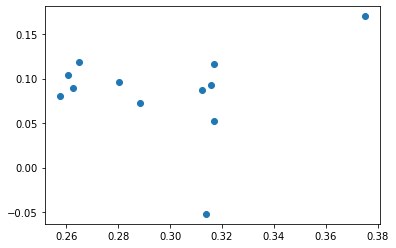

In [21]:
import matplotlib.pyplot as plt 
x = Ann_sd # Risk
y = ind_er # Return 
plt.scatter(x, y)
plt.show()

In [22]:
#We first start by creating a list of assets and the corresponding weights
p_ret = [] #Defining an empty array for portfolio returns 
p_vol = [] #Defining an empty array for portfolio volatility 
#The code then creates an empty list (p_weights) holding the asset weights
p_weights = [] #Defining an empty array for asset weights

num_assets = len(df.columns) 
num_portfolios = 10000

#By running a loop, each iteration uses a different randomly selected weight and determines the results
#of each generated portfolio. p_weights allows the machine to work with a new random set fo weights 
#each time it loops through each portfolio - the loop is then run 10000 times as set in num_portfolios

In [23]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights) #We now append this line to the previously created p_weights
    returns = np.dot(weights, ind_er) 
    # Returns are the product of individual expected returns of asset and its weights
    # These returns are calculated using the dot product between the weight and indicator

    p_ret.append(returns)
    # The returns are now added to p_ret and p_vol 
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    #We then calculate the volatility using the above covariance matrix using the weight and indicator
    #before then squaring it to get the standard deviation sd
    sd = np.sqrt(var) #Daily standard deviation
    Ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol.append(Ann_sd)
    
#The code then creates a list of portfolios after appending the var and sd values to the portfolio's volatility

In [24]:
# Each portfolio is created with the weights of the assets in that particular portfolio 
# thus returns are calculated by multiplying those weights by the asset's price.

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()): 
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() 
# Dataframe of the 10000 portfolios created
# The code then creates an array of data for each ETF in the dataset,
# where each row contains the weight of that asset 
# and how much it contributes to the total portfolio's return and volatility respectively.

,Returns,Volatility,BUG weight,CALF weight,DSTL weight,ESGU weight,EWU weight,FDN weight,IXN weight,QQQ weight,QUAL weight,VGT weight,VOO weight,XLK weight
0,0.081063,0.265035,0.082822,0.075062,0.129200,0.084839,0.103465,0.125765,0.021271,0.051961,0.116659,0.038577,0.061842,0.108536
1,0.090555,0.266894,0.112920,0.129559,0.079661,0.048549,0.082602,0.048748,0.109623,0.102185,0.102490,0.074218,0.109089,0.000354
2,0.080494,0.267047,0.097274,0.087764,0.091616,0.089963,0.104546,0.110666,0.086247,0.074403,0.051560,0.105072,0.096793,0.004096
3,0.091545,0.274275,0.143207,0.120201,0.066572,0.055038,0.026439,0.061982,0.046193,0.045345,0.074921,0.116845,0.082094,0.161165
4,0.088207,0.277328,0.120974,0.042079,0.021974,0.120636,0.012613,0.010294,0.138766,0.109444,0.121826,0.159687,0.040735,0.100973


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

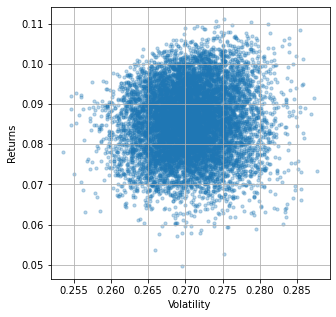

In [25]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [26]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()] 
# idxmin() gives us the minimum value in the column specified. 
min_vol_port

Returns        0.078113
Volatility     0.253576
BUG weight     0.187649
CALF weight    0.021478
DSTL weight    0.122728
ESGU weight    0.076727
EWU weight     0.210976
FDN weight     0.073759
IXN weight     0.007697
QQQ weight     0.033529
QUAL weight    0.165567
VGT weight     0.036772
VOO weight     0.029633
XLK weight     0.033485
Name: 4898, dtype: float64

Text(0.5, 1.0, 'Minimum Volatility Portfolio')

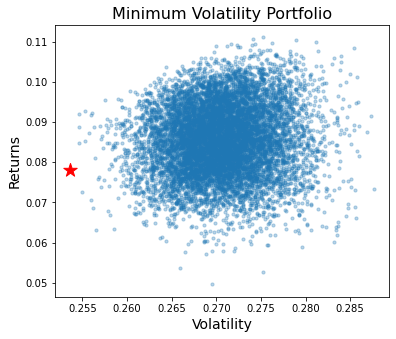

In [72]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3) 
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)
plt.xlabel('Volatility', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.title('Minimum Volatility Portfolio', fontsize=16)
# The graphic below shows the scatter plot of the returns and volatility for all portfolios
# This code creates subplots for the portfolio volatility and returns to then use the 'o' marker to
# mark all the points that fall within 10 standard deviations from the mean
# The red start represents the most efficient portfolio with the lowest volatility

In [28]:
# Finding the optimal portfolio using the Sharpe Ratio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()] 
# The ixmax() function from NumPy returns the index of the maximum value in a given array, creating
# an index for the risky portfolio with the highest return and lowest volatility
optimal_risky_port
# This gives us the portfolio with the highest expected return and lowest volatility
# The optimal_risky_portfolio is created by taking all of the indexes and finding 
# the maximum value to create one portfolio that has both high returns and low risk

Returns        0.111083
Volatility     0.275209
BUG weight     0.022237
CALF weight    0.170336
DSTL weight    0.176656
ESGU weight    0.014620
EWU weight     0.072081
FDN weight     0.010675
IXN weight     0.012540
QQQ weight     0.027860
QUAL weight    0.136073
VGT weight     0.101237
VOO weight     0.078481
XLK weight     0.177204
Name: 6830, dtype: float64

Text(0.5, 1.0, 'Optimal Portfolio 1')

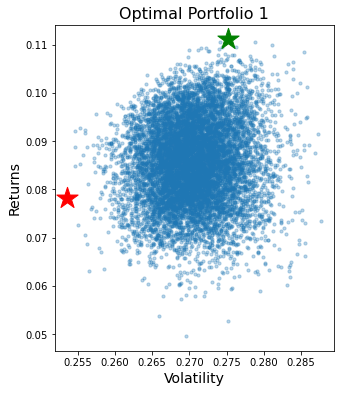

In [79]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3) 
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500) 
# This subplot has a lower volatility than any other portfolio in the data set using min_vol_port
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
# This subplot has an equal or higher volatility than any other portfolio in the data set
# We then create a scatter plot between minimum volatility and return on that same axis (the y-axis)
plt.xlabel('Volatility', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.title('Optimal Portfolio 1', fontsize=16)
# This creates a scatter plot of optimal risky portfolios against their risk-averse counterparts
# The green star is the optimal risky portfolio while the red one is the most efficient portfolio
# while keeping a minimal volatility

In [30]:
# Import data for portfolio 2 with 9 ETFs
df2 = yf.download('BUG CALF DSTL ESGU EWU QQQ VGT VOO XLK', start='2020-03-01', end='2022-03-01') 
df2.tail()

[*********************100%***********************]  9 of 9 completed


Adj Close                                                          \
                  BUG       CALF       DSTL       ESGU        EWU         QQQ   
Date                                                                            
2022-02-22  27.879999  40.090000  43.419998  96.379997  34.090000  338.079987   
2022-02-23  27.309999  39.540001  42.770000  94.610001  34.099998  329.420013   
2022-02-24  29.420000  40.060001  42.950001  96.279999  32.939999  340.489990   
2022-02-25  29.730000  41.049999  44.029999  98.339996  34.220001  345.769989   
2022-02-28  30.860001  41.310001  43.869999  98.160004  33.490002  346.799988   

                                                    Close  ...        Open  \
                   VGT         VOO         XLK        BUG  ...         XLK   
Date                                                       ...               
2022-02-22  394.179993  394.920013  151.029999  27.879999  ...  150.839996   
2022-02-23  384.209991  387.809998  147.250000  27.309999  ...  152.600006   
2022-02-24  398.089996  393.769989  152.279999  29.420000  ...  142.190002   
2022-02-25  403.820007  402.369995  154.350006  29.730000  ...  152.509995   
2022-02-28  403.910004  401.359985  154.070007  30.860001  ...  152.710007   

             Volume                                                         \
                BUG    CALF    DSTL     ESGU       EWU        QQQ      VGT   
Date                                                                         
2022-02-22   272500  223000   83700  1512900   5654400   85967100  2183500   
2022-02-23   308000  255800  133100  1851800   5626300   86215400   718400   
2022-02-24  1737600  971400  307100  1825600  11730800  130614100  2310000   
2022-02-25   835500  150000  219900  1119800   7636400   78842100   670600   
2022-02-28  1406500  243100  110000  1632800   6595400   77226200   592500   

                                
                 VOO       XLK  
Date                            
2022-02-22  10414700  13446800  
2022-02-23  12154900  18939700  
2022-02-24  21277200  25483900  
2022-02-25  11665200  14150800  
2022-02-28  11855900  17408600  

[5 rows x 54 columns]

In [31]:
# Closing price
df2 = df2['Adj Close'] 
df2.head()

,BUG,CALF,DSTL,ESGU,EWU,QQQ,VGT,VOO,XLK
Date,,,,,,,,,
2020-03-02,16.127825,22.777254,28.531368,67.079514,27.528002,214.163071,243.604660,274.918427,91.621025
2020-03-03,15.668723,22.353464,27.747002,65.318352,27.183084,207.295441,234.715790,267.335327,88.141609
2020-03-04,16.068586,22.924103,28.943163,68.052521,28.273764,215.944305,244.292206,278.414581,91.924850
2020-03-05,15.752645,22.011475,27.992117,65.902161,27.453424,209.383453,236.650711,269.088287,89.023727
2020-03-06,15.248127,21.754240,27.697979,64.598328,26.978001,205.850677,231.631668,264.575165,87.141907


In [32]:
# Log of percentage change and creeate Covariance matrix
cov_matrix2 = df2.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix2

,BUG,CALF,DSTL,ESGU,EWU,QQQ,VGT,VOO,XLK
BUG,0.000398,0.000198,0.000185,0.000215,0.000156,0.000269,0.000297,0.000206,0.000283
CALF,0.000198,0.000558,0.000317,0.000300,0.000329,0.000253,0.000295,0.000301,0.000294
DSTL,0.000185,0.000317,0.000279,0.000266,0.000252,0.000257,0.000288,0.000265,0.000292
ESGU,0.000215,0.000300,0.000266,0.000273,0.000245,0.000278,0.000310,0.000271,0.000312
EWU,0.000156,0.000329,0.000252,0.000245,0.000312,0.000216,0.000246,0.000246,0.000249
QQQ,0.000269,0.000253,0.000257,0.000278,0.000216,0.000330,0.000355,0.000273,0.000355
VGT,0.000297,0.000295,0.000288,0.000310,0.000246,0.000355,0.000396,0.000304,0.000395
VOO,0.000206,0.000301,0.000265,0.000271,0.000246,0.000273,0.000304,0.000269,0.000307
XLK,0.000283,0.000294,0.000292,0.000312,0.000249,0.000355,0.000395,0.000307,0.000398


In [33]:
corr_matrix2 = df2.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix2

,BUG,CALF,DSTL,ESGU,EWU,QQQ,VGT,VOO,XLK
BUG,1.000000,0.420983,0.554116,0.651048,0.444256,0.743118,0.748263,0.628700,0.711571
CALF,0.420983,1.000000,0.802964,0.769285,0.787927,0.590049,0.628877,0.776838,0.623597
DSTL,0.554116,0.802964,1.000000,0.963274,0.855595,0.845533,0.867131,0.966881,0.877352
ESGU,0.651048,0.769285,0.963274,1.000000,0.838896,0.924829,0.941417,0.997880,0.944990
EWU,0.444256,0.787927,0.855595,0.838896,1.000000,0.672468,0.700348,0.847584,0.706398
QQQ,0.743118,0.590049,0.845533,0.924829,0.672468,1.000000,0.981576,0.915762,0.979809
VGT,0.748263,0.628877,0.867131,0.941417,0.700348,0.981576,1.000000,0.932486,0.996481
VOO,0.628700,0.776838,0.966881,0.997880,0.847584,0.915762,0.932486,1.000000,0.938421
XLK,0.711571,0.623597,0.877352,0.944990,0.706398,0.979809,0.996481,0.938421,1.000000


In [34]:
# Randomly weighted portfolio's variance
w = {'BUG':0.1111, 'CALF':0.1111, 'DSTL':0.1111, 'ESGU':0.1111,'EWU':0.1111,'QQQ':0.1111, 'VGT':0.1111, 'VOO':0.1111, 'XLK': 0.1111} 
port_var2 = cov_matrix2.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std2 = (port_var2*252)**(0.5)
print (port_var2)
print (port_var2*252)

0.0002835544734571958
0.07145572731121334


In [35]:
Ann_port_std2

0.26731204108908624

In [36]:
# Yearly returns for individual companies
ind_er2 = df2.resample('Y').last().pct_change().mean() 
ind_er2

BUG     0.051847
CALF    0.170127
DSTL    0.118316
ESGU    0.089318
EWU     0.096253
QQQ     0.072941
VGT     0.093038
VOO     0.103646
XLK     0.116781
dtype: float64

In [37]:
# Portfolio returns
w = [0.1111, 0.1111, 0.1111, 0.1111,0.1111,0.1111,0.1111,0.1111,0.1111] 
port_er2 = (w*ind_er2).sum()
port_er2

0.1013530606737653

In [38]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
Ann_sd2 = df2.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252)) 
Ann_sd2

BUG     0.316734
CALF    0.374915
DSTL    0.264979
ESGU    0.262425
EWU     0.280246
QQQ     0.288516
VGT     0.315744
VOO     0.260570
XLK     0.316744
dtype: float64

In [39]:
assets2 = pd.concat([ind_er2, Ann_sd2], axis=1) 
# Creating a table for visualising returns and volatility of assets 
assets2.columns = ['Returns', 'Volatility']
assets2

,Returns,Volatility
BUG,0.051847,0.316734
CALF,0.170127,0.374915
DSTL,0.118316,0.264979
ESGU,0.089318,0.262425
EWU,0.096253,0.280246
QQQ,0.072941,0.288516
VGT,0.093038,0.315744
VOO,0.103646,0.260570
XLK,0.116781,0.316744


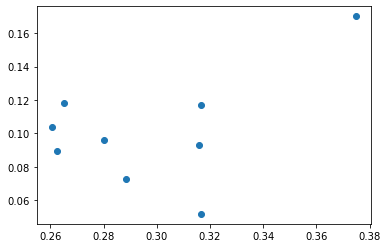

In [40]:
import matplotlib.pyplot as plt 
x = Ann_sd2 # Risk
y = ind_er2 # Return 
plt.scatter(x, y)
plt.show()

In [41]:
p_ret2 = [] # Define an empty array for portfolio returns 
p_vol2 = [] # Define an empty array for portfolio volatility 
p_weights2 = [] # Define an empty array for asset weights

num_assets2 = len(df2.columns) 
num_portfolios2 = 10000

In [42]:
for portfolio2 in range(num_portfolios2):
    weights2 = np.random.random(num_assets2)
    weights2 = weights2/np.sum(weights2)
    p_weights2.append(weights2)
    returns2 = np.dot(weights2, ind_er2) 
    # Returns are the product of individual expected returns of asset and its weights

    p_ret2.append(returns2)
    var2 = cov_matrix2.mul(weights2, axis=0).mul(weights2, axis=1).sum().sum() # Portfolio Variance
    sd2 = np.sqrt(var2) #Daily standard deviation
    Ann_sd2 = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol2.append(Ann_sd2)

In [43]:
data2 = {'Returns':p_ret2, 'Volatility':p_vol2}

for counter, symbol in enumerate(df2.columns.tolist()): 
    #print(counter, symbol)
    data2[symbol+' weight'] = [w[counter] for w in p_weights2]
portfolios2 = pd.DataFrame(data2)
portfolios2.head() 
# Dataframe of the 10000 portfolios created

,Returns,Volatility,BUG weight,CALF weight,DSTL weight,ESGU weight,EWU weight,QQQ weight,VGT weight,VOO weight,XLK weight
0,0.102088,0.272468,0.144533,0.175499,0.071206,0.033379,0.131786,0.139357,0.101421,0.200991,0.001828
1,0.108601,0.272468,0.153190,0.188762,0.108588,0.119908,0.075435,0.032479,0.022439,0.127190,0.172008
2,0.099310,0.272468,0.105796,0.050249,0.182432,0.042007,0.155051,0.108505,0.089679,0.178133,0.088148
3,0.094056,0.272468,0.101531,0.007332,0.076592,0.165952,0.155948,0.134220,0.059660,0.120448,0.178317
4,0.089138,0.272468,0.216553,0.075742,0.033292,0.073479,0.044923,0.222480,0.203307,0.011599,0.118625


In [44]:
min_vol_port2 = portfolios2.iloc[portfolios2['Volatility'].idxmin()] 
# idxmin() gives us the minimum value in the column specified. 
min_vol_port2

Returns        0.102088
Volatility     0.272468
BUG weight     0.144533
CALF weight    0.175499
DSTL weight    0.071206
ESGU weight    0.033379
EWU weight     0.131786
QQQ weight     0.139357
VGT weight     0.101421
VOO weight     0.200991
XLK weight     0.001828
Name: 0, dtype: float64

In [45]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port2 = portfolios2.iloc[((portfolios2['Returns']-rf)/portfolios2['Volatility']).idxmax()] 
optimal_risky_port2

Returns        0.126932
Volatility     0.272468
BUG weight     0.039042
CALF weight    0.398744
DSTL weight    0.031772
ESGU weight    0.065188
EWU weight     0.010285
QQQ weight     0.018965
VGT weight     0.136348
VOO weight     0.195163
XLK weight     0.104493
Name: 3522, dtype: float64

In [46]:
# Import data for portfolio 2 with 6 ETFs
df3 = yf.download('DSTL ESGU EWU QQQ VGT VOO', start='2020-03-01', end='2022-03-01') 
df3.tail()

[*********************100%***********************]  6 of 6 completed


Adj Close                                                \
                 DSTL       ESGU        EWU         QQQ         VGT   
Date                                                                  
2022-02-22  43.419998  96.379997  34.090000  338.079987  394.179993   
2022-02-23  42.770000  94.610001  34.099998  329.420013  384.209991   
2022-02-24  42.950001  96.279999  32.939999  340.489990  398.089996   
2022-02-25  44.029999  98.339996  34.220001  345.769989  403.820007   
2022-02-28  43.869999  98.160004  33.490002  346.799988  403.910004   

                            Close                                    ...  \
                   VOO       DSTL       ESGU        EWU         QQQ  ...   
Date                                                                 ...   
2022-02-22  394.920013  43.419998  96.379997  34.090000  338.079987  ...   
2022-02-23  387.809998  42.770000  94.610001  34.099998  329.420013  ...   
2022-02-24  393.769989  42.950001  96.279999  32.939999  340.489990  ...   
2022-02-25  402.369995  44.029999  98.339996  34.220001  345.769989  ...   
2022-02-28  401.359985  43.869999  98.160004  33.490002  346.799988  ...   

                 Open                                      Volume           \
                  EWU         QQQ         VGT         VOO    DSTL     ESGU   
Date                                                                         
2022-02-22  34.130001  338.489990  394.589996  397.049988   83700  1512900   
2022-02-23  34.480000  341.320007  398.109985  397.739990  133100  1851800   
2022-02-24  32.720001  318.839996  370.880005  377.760010  307100  1825600   
2022-02-25  33.500000  341.309998  398.859985  394.950012  219900  1119800   
2022-02-28  33.400002  342.510010  400.149994  397.179993  110000  1632800   

                                                    
                 EWU        QQQ      VGT       VOO  
Date                                                
2022-02-22   5654400   85967100  2183500  10414700  
2022-02-23   5626300   86215400   718400  12154900  
2022-02-24  11730800  130614100  2310000  21277200  
2022-02-25   7636400   78842100   670600  11665200  
2022-02-28   6595400   77226200   592500  11855900  

[5 rows x 36 columns]

In [47]:
# Closing price
df3 = df3['Adj Close'] 
df3.head()

,DSTL,ESGU,EWU,QQQ,VGT,VOO
Date,,,,,,
2020-03-02,28.531370,67.079514,27.528002,214.163071,243.604675,274.918396
2020-03-03,27.747002,65.318352,27.183084,207.295441,234.715775,267.335358
2020-03-04,28.943163,68.052521,28.273766,215.944305,244.292206,278.414581
2020-03-05,27.992117,65.902161,27.453426,209.383453,236.650681,269.088257
2020-03-06,27.697979,64.598328,26.978001,205.850677,231.631683,264.575226


In [48]:
cov_matrix3 = df3.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix3

,DSTL,ESGU,EWU,QQQ,VGT,VOO
DSTL,0.000279,0.000266,0.000252,0.000257,0.000288,0.000265
ESGU,0.000266,0.000273,0.000245,0.000278,0.000310,0.000271
EWU,0.000252,0.000245,0.000312,0.000216,0.000246,0.000246
QQQ,0.000257,0.000278,0.000216,0.000330,0.000355,0.000273
VGT,0.000288,0.000310,0.000246,0.000355,0.000396,0.000304
VOO,0.000265,0.000271,0.000246,0.000273,0.000304,0.000269


In [49]:
corr_matrix3 = df3.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix3

,DSTL,ESGU,EWU,QQQ,VGT,VOO
DSTL,1.000000,0.963274,0.855595,0.845533,0.867131,0.966881
ESGU,0.963274,1.000000,0.838896,0.924829,0.941416,0.997880
EWU,0.855595,0.838896,1.000000,0.672469,0.700348,0.847584
QQQ,0.845533,0.924829,0.672469,1.000000,0.981576,0.915762
VGT,0.867131,0.941416,0.700348,0.981576,1.000000,0.932486
VOO,0.966881,0.997880,0.847584,0.915762,0.932486,1.000000


In [50]:
# Randomly weighted portfolio's variance
w3 = {'DSTL':0.1666, 'ESGU':0.1666,'EWU':0.1666,'QQQ':0.1666, 'VGT':0.1666, 'VOO':0.1666} 
port_var3 = cov_matrix3.mul(w3, axis=0).mul(w3, axis=1).sum().sum()
Ann_port_std3 = (port_var3*252)**(0.5)
print (port_var3)
print (port_var3*252)

0.0002775277300589073
0.06993698797484463


In [51]:
Ann_port_std3

0.26445602276152574

In [52]:
# Yearly returns for individual companies
ind_er3 = df3.resample('Y').last().pct_change().mean() 
ind_er3

DSTL    0.118316
ESGU    0.089318
EWU     0.096253
QQQ     0.072941
VGT     0.093037
VOO     0.103647
dtype: float64

In [53]:
# Portfolio returns
w3 = [0.1666, 0.1666, 0.1666, 0.1666,0.1666,0.1666] 
port_er3 = (w3*ind_er3).sum()
port_er3

0.0955473089795454

In [54]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year.
Ann_sd3 = df3.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252)) 
Ann_sd3

DSTL    0.264979
ESGU    0.262425
EWU     0.280247
QQQ     0.288516
VGT     0.315744
VOO     0.260570
dtype: float64

In [55]:
assets3 = pd.concat([ind_er3, Ann_sd3], axis=1) 
# Creating a table for visualising returns and volatility of assets 
assets3.columns = ['Returns', 'Volatility']
assets3

,Returns,Volatility
DSTL,0.118316,0.264979
ESGU,0.089318,0.262425
EWU,0.096253,0.280247
QQQ,0.072941,0.288516
VGT,0.093037,0.315744
VOO,0.103647,0.260570


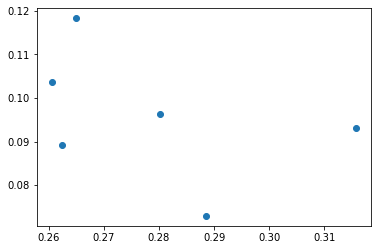

In [56]:
import matplotlib.pyplot as plt 
x = Ann_sd3 # Risk
y = ind_er3 # Return 
plt.scatter(x, y)
plt.show()

In [57]:
p_ret3 = [] # Define an empty array for portfolio returns 
p_vol3 = [] # Define an empty array for portfolio volatility 
p_weights3 = [] # Define an empty array for asset weights

num_assets3 = len(df3.columns) 
num_portfolios3 = 10000

In [58]:
for portfolio3 in range(num_portfolios3):
    weights3 = np.random.random(num_assets3)
    weights3 = weights3/np.sum(weights3)
    p_weights3.append(weights3)
    returns3 = np.dot(weights3, ind_er3) 
    # Returns are the product of individual expected returns of asset and its weights

    p_ret3.append(returns3)
    var3 = cov_matrix3.mul(weights3, axis=0).mul(weights3, axis=1).sum().sum() # Portfolio Variance
    sd3 = np.sqrt(var3) #Daily standard deviation
    Ann_sd3 = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol3.append(Ann_sd3)

In [59]:
data3 = {'Returns':p_ret3, 'Volatility':p_vol3}

for counter, symbol in enumerate(df3.columns.tolist()): 
    #print(counter, symbol)
    data3[symbol+' weight'] = [w3[counter] for w3 in p_weights3]
portfolios3 = pd.DataFrame(data3)
portfolios3.head() 
# Dataframe of the 10000 portfolios created

,Returns,Volatility,DSTL weight,ESGU weight,EWU weight,QQQ weight,VGT weight,VOO weight
0,0.094849,0.272468,0.031286,0.067496,0.189528,0.103629,0.349298,0.258762
1,0.097416,0.272468,0.305467,0.263187,0.015781,0.128594,0.271013,0.015958
2,0.101985,0.272468,0.363584,0.096328,0.069002,0.063472,0.297521,0.110093
3,0.094926,0.272468,0.080887,0.028928,0.236075,0.195609,0.164086,0.294414
4,0.101370,0.272468,0.241815,0.020896,0.170053,0.130742,0.023850,0.412644


In [60]:
min_vol_port3 = portfolios3.iloc[portfolios3['Volatility'].idxmin()] 
# idxmin() gives us the minimum value in the column specified. 
min_vol_port3

Returns        0.094849
Volatility     0.272468
DSTL weight    0.031286
ESGU weight    0.067496
EWU weight     0.189528
QQQ weight     0.103629
VGT weight     0.349298
VOO weight     0.258762
Name: 0, dtype: float64

In [61]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port3 = portfolios3.iloc[((portfolios3['Returns']-rf)/portfolios3['Volatility']).idxmax()] 
optimal_risky_port3

Returns        0.109632
Volatility     0.272468
DSTL weight    0.689498
ESGU weight    0.130079
EWU weight     0.085259
QQQ weight     0.039979
VGT weight     0.038386
VOO weight     0.016798
Name: 454, dtype: float64

Text(0.5, 1.0, 'Optimal Portfolio 3')

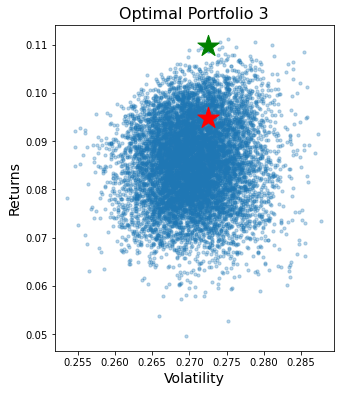

In [80]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3) 
plt.scatter(min_vol_port3[1], min_vol_port3[0], color='r', marker='*', s=500) 
# This subplot has a lower volatility than any other portfolio in the data set using min_vol_port
plt.scatter(optimal_risky_port3[1], optimal_risky_port3[0], color='g', marker='*', s=500)
# This subplot has an equal or higher volatility than any other portfolio in the data set
# We then create a scatter plot between minimum volatility and return on that same axis (the y-axis)
plt.xlabel('Volatility', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.title('Optimal Portfolio 3', fontsize=16)
# This creates a scatter plot of optimal risky portfolios against their risk-averse counterparts
# The green star is the optimal risky portfolio while the red one is the most efficient portfolio
# while keeping a minimal volatility

Text(0.5, 1.0, 'Optimal Portfolio 2')

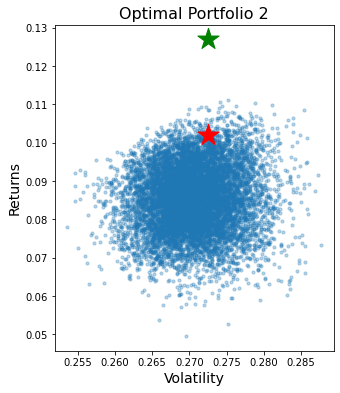

In [82]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3) 
plt.scatter(min_vol_port2[1], min_vol_port2[0], color='r', marker='*', s=500) 
# This subplot has a lower volatility than any other portfolio in the data set using min_vol_port
plt.scatter(optimal_risky_port2[1], optimal_risky_port2[0], color='g', marker='*', s=500)
# This subplot has an equal or higher volatility than any other portfolio in the data set
# We then create a scatter plot between minimum volatility and return on that same axis (the y-axis)
plt.xlabel('Volatility', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.title('Optimal Portfolio 2', fontsize=16)
# This creates a scatter plot of optimal risky portfolios against their risk-averse counterparts
# The green star is the optimal risky portfolio while the red one is the most efficient portfolio
# while keeping a minimal volatility